<a id='ej1'></a>
# Introduction

In this notebook I explore the performance of different supervised machine learning (ML) algorithms using a synthetic dataset, Spiral, which consists of 4 intercalated spirals situated in a two-dimensional space.

The performance of each ML algorithm is evaluated as its capacity to predict the class of new data points based on their coordinates (x, y).

The dataset consists of 2000 data points distributed in 4 classes, one for each spiral.

The following supervised ML algorithms will be used in the notebook:
-Naive-Bayes
-Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA)
-K-nearest neighbors (KNN)
-Support vector machines (SVM)
-Decission trees

Each of the algorithms has peculiarities that affect its performance and make it more or less prone to overfitting. I will describe which are these peculiarities and how they affect the outcomes.

There is a "environment.yaml" file with the required packages and versions as well as a "spiral.pickle" file containing the data points and labels in this repository

This notebook derives from exercises performed in the Data Science MSc by UOC

In [17]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
%matplotlib inline

X dimensions (2000, 2)
y dimensions (2000,)


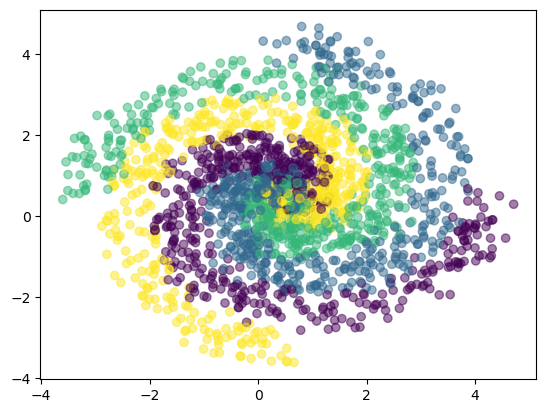

In [18]:
data = pd.read_pickle('spiral.pickle')

# Convert the attributes containing x and y coordinates information to a numpy array
X = data[['X1', 'X2']].values

# Convert the labels attribute to a numpy array
y = data['y'].values

print('X dimensions', X.shape)
print('y dimensions', y.shape)

# Graphic representation of the dataset
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.viridis, alpha=0.5)
plt.show()

Through this notebook I will show the prediction that several supervised ML algorithms return for part of the points in this dataset. In order to better visualize how each algorithm would assign each (x, y) point to any of the 4 classes, and to better understand how each algorithm works, I will also plot, for each algorithm, the decision boundary. To do so, I will use this function:

In [19]:
def plot_decision_boundary(clf, X, Y, cmap='Paired'):
    if not isinstance(X, np.ndarray):  # If X is not a numpy array, converts it
        X = X.to_numpy()

    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,7))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k', label=Y);

I will divide the data points in a training and a test sets. The training set will contain 80% of the data points 

In [20]:
random_state = 24 # Ensure replicability

# Data points separation
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state = random_state)

## 1.1. Gaussian Naïve Bayes

The Naïve-Bayes algorithm has as its main assumption the independence of the variables. It basically employs Bayesian statistics to calculate the probability that a sample has of belonging to any of the (in this case) 4 classes depending on the values for each of its variables. as stated above, it assumes that the different variables are independent and, therefore, does not consider the possibility that, for instance, the values for the y variable might have an impact on the class of the sample for different values of the x variable. 

This is the implementation of the algorithm with the dataset:

In [21]:
# Instantiate and train the model
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB()

In [22]:
# Calculate the accuracy for training and test sets
prediction_train_nb = clf_nb.predict(X_train)
accuracy_train_nb = accuracy_score(y_train, prediction_train_nb)
print("Accuracy for the training set is: "+str(accuracy_train_nb))

prediction_test_nb = clf_nb.predict(X_test)
accuracy_test_nb = accuracy_score(y_test, prediction_test_nb)
print("Accuracy for the test set is: "+str(accuracy_test_nb))

Accuracy for the training set is: 0.294375
Accuracy for the test set is: 0.2475


In [23]:
# Show the confusion matrix
confusion_matrix_nb = confusion_matrix(y_test, prediction_test_nb)
confusion_matrix_nb

array([[15, 27, 27, 33],
       [32, 37, 10, 31],
       [32, 35, 23,  9],
       [18, 23, 24, 24]], dtype=int64)

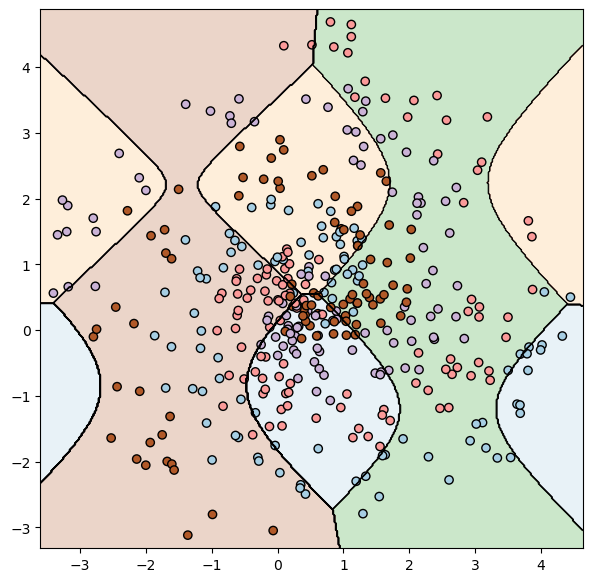

In [24]:
# Plot the decision boundary
plot_decision_boundary(clf_nb, X_test, y_test)

The Naive-Bayes algorithm's main assumption is the independence of variables. This is a dataset in which we clearly see that, for a given label, such independence does not exist. If we are given an x for the blue label, for example, we can approximate the value that y will have. Therefore, this dataset violates the main assumption of the algorithm. The decision boundaries shown by the algorithm are complex and poorly adapt to the real distribution of the data due to the high dependence of variables for a point of any given class. Regarding predictions on the test set, we also see poor performance. The accuracy is only 0.2475, close to randomness.

## 1.2. Linear discriminant analysis and quadratic discriminant analysis (QDA)

### 1.2.1 Linear discriminant analysis (LDA)

The LDA algorithm assumes a Gaussian distribution of the samples and tries to estimate the parameters of that hypothetical distribution. It seeks to find linear discriminants that best separate the samples given their labels. 

This is the implementation of the algorithm with the dataset:

In [25]:
# Instantiate and train the model
clf_ld = LinearDiscriminantAnalysis()
clf_ld.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [26]:
# Calculate the accuracy for training and test sets
prediction_train_ld = clf_ld.predict(X_train)
accuracy_train_ld = accuracy_score(y_train, prediction_train_ld)
print("Accuracy for the training set is: "+str(accuracy_train_ld))

prediction_test_ld = clf_ld.predict(X_test)
accuracy_test_ld = accuracy_score(y_test, prediction_test_ld)
print("Accuracy for the test set is: "+str(accuracy_test_ld))

Accuracy for the training set is: 0.255
Accuracy for the test set is: 0.2475


In [27]:
# Show the confusion matrix
confusion_matrix_ld = confusion_matrix(y_test, prediction_test_ld)
confusion_matrix_ld

array([[24, 29, 24, 25],
       [27, 27, 21, 35],
       [27, 28, 24, 20],
       [17, 25, 23, 24]], dtype=int64)

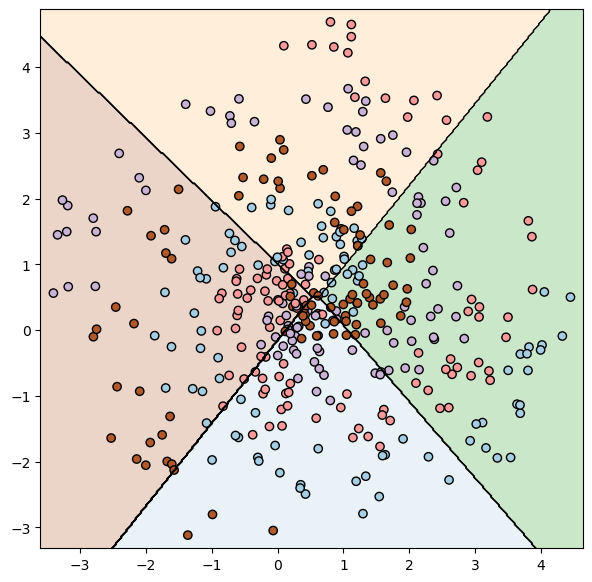

In [28]:
# Plot the decision boundary
plot_decision_boundary(clf_ld, X_test, y_test)

As stated above, LDA algorithm seeks to find linear discriminants that best separate the samples given their labels. It is the linear nature of these discriminants that gives the decision boundaries the shape we see. Similarly to what we saw with Naïve Bayes, this dataset does not fit well with the nature of our dataset. The boundaries between the data of different classes are not linear, and therefore the discriminants that the algorithm finds do not properly classify the samples of the test dataset. It is interesting to note how algorithms can fail in a very similar way (the accuracy with both the Naive Bayes algorithm and the LDA algorithm) for radically different reasons. In the case of Naive Bayes, there should not be major issues because the classes are separated by a curve instead of a line (something that negatively affects LDA), while in the case of LDA, the dependence of the variables should not be as important as for Naive Bayes. We can conclude that neither of the two allows us to correctly classify the data, but by evaluating the decision boundaries, the dataset we have, and the assumptions of each algorithm, we are closer to understanding the reasons underlying the "quality" of each algorithm and thus be able to choose the most optimal one on each occasion.

### 1.2.2 Quadratic discriminant analysis (LDA)
The 
QDA also assumes (like LDA) a Gaussian distribution of the data but it, relaxes certain restrictions that LDA has (such as the existence of a common covariance matrix for each class), and estimates more parameters of the samples, this time through a quadratic equation. 

This is the implementation of the algorithm with the dataset:

In [29]:
# Instantiate and train the model
clf_qd = QuadraticDiscriminantAnalysis()
clf_qd.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [30]:
# Calculate the accuracy for training and test sets
prediction_train_qd = clf_qd.predict(X_train)
accuracy_train_qd = accuracy_score(y_train, prediction_train_qd)
print("Accuracy for the training set is: "+str(accuracy_train_qd))

prediction_test_qd = clf_qd.predict(X_test)
accuracy_test_qd = accuracy_score(y_test, prediction_test_qd)
print("Accuracy for the test set is: "+str(accuracy_test_qd))

Accuracy for the training set is: 0.26375
Accuracy for the test set is: 0.215


In [31]:
# Show the confusion matrix
confusion_matrix_qd = confusion_matrix(y_test, prediction_test_qd)
confusion_matrix_qd

array([[28, 13, 33, 28],
       [40, 18, 11, 41],
       [38, 36, 19,  6],
       [16, 29, 23, 21]], dtype=int64)

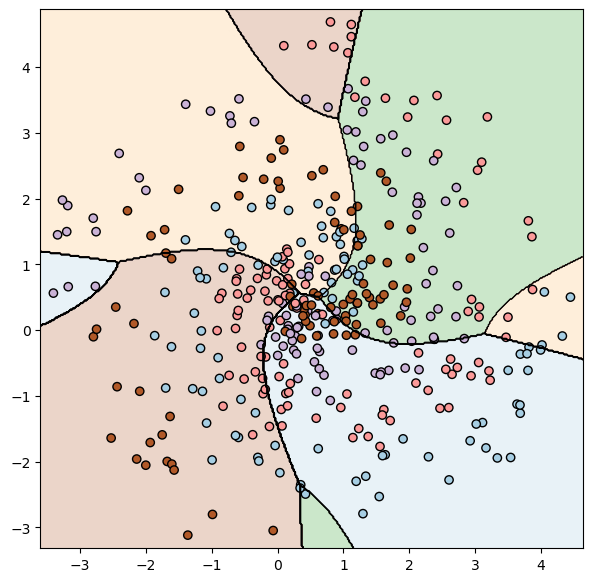

In [32]:
# Plot the decision boundary
plot_decision_boundary(clf_qd, X_test, y_test)

The quadratic nature of the equation that QDA algorithm employs is the reason for the shape of the decision boundaries, which resemble a set of representations of quadratic functions. We observe that the accuracy of the algorithm is also quite low (in fact, lower than that of LDA, which was close to random assignment). We can understand the reason if we look at the decision boundaries. The curves in these boundaries are clearly less pronounced than the curves in the spirals, so clearly the algorithm does not have the ability to "adapt" to the dataset.<br>

Here some insights about the two algorithms:<br>

Assumptions:<br>
LDA: Assumes that all classes have the same covariance matrix and that the predictor variables are normally distributed. This implies that classes mainly differ in terms of their mean.<br>
QDA: Relax the assumption that all classes share the same covariance matrix. Each class can have its own covariance matrix, making the model more flexible in representing the data structure.<br>

Approach:<br>
LDA: Seeks the hyperplane that best separates the classes by maximizing the separation between class means and minimizing dispersion within each class.<br>
QDA: By allowing different covariance matrices, it models the covariance structure of each class more precisely. This can capture nonlinear relationships and more complex distributions in the data.<br>

Results on the data:<br>
LDA: Gives us a result similar to what would be expected if we assigned the samples randomly, because the classification boundaries are linear and occupy the same area radiating from the center.<br>
QDA: Gives us a slightly inferior result. Probably because of the "shape" it gives to the decision boundaries, which do not fit the spirals well enough, it ends up providing worse accuracy.